# Homework Lecture 8
- generate a data with random noise
- choose different polynomial function to fit the data
- discuss which polynomial function yields the best fit and give your reasoning.

The code below is based off experimental data collected in PHYS 413 (modern labratory). The code first defines the diffraction equation where x is our angle of diffraction, a is our incident angle, and b is the diffraction grating. The data that was collected was the diffraction angle of different colors of visible light in Mercury. Because of the wavelengths of visible light being well-known, the angle of diffraction can be plotted against these values. Next, by performing a curve fit to the data and the diffraction equation, we are able to find our true angle of incidence and our true diffraction grating. The plot below shows that both the ideal function and curve fit function are a close match to one another. 

Diffraction equation $f = d(\sin{\theta_d - \theta_i} + \sin{\theta_i})=m\lambda$

[4.90008616e-01 1.66699706e+03]


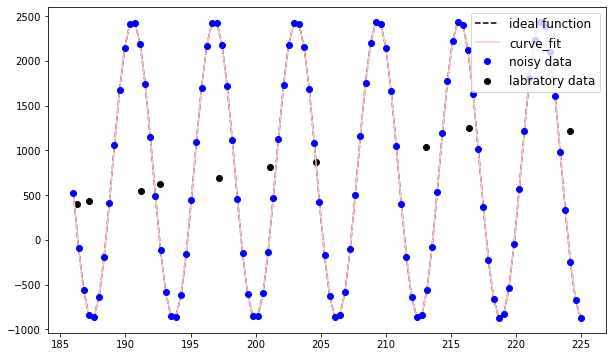

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.figure(figsize=[10, 6])

#define the function
f = lambda x,a,b: b*(np.sin(x - a) + np.sin(a))

x_min, x_max = 186, 225
npoints = 100
a,b = .49, 1667

x = np.linspace(x_min, x_max, npoints)
y = f(x,a,b) + np.random.rand(npoints) - 0.5


lamALL = np.array([405, 436, 550, 623, 691, 810, 872, 1038, 1246, 1215])
thetaALL = np.array([186.3, 187.2, 191.2, 192.69, 197.18,201.12, 204.65, 213.07, 216.41, 224.16])

plt.scatter(thetaALL, lamALL, color='black', label='labratory data')

params, extras = curve_fit(f, x, y)

print(params)

plt.plot(x,f(x,a,b), '--',color='black', label='ideal function')
plt.plot(x,f(x,*params),'-', color='pink', label='curve_fit')
plt.plot(x,y, 'o',color='blue', label='noisy data')
plt.legend(fontsize=12)
plt.show()